In [35]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
size = 10000

In [70]:
input_vector = np.random.random(size)
u1 = input_vector[:size/2]
u2 = input_vector[size/2:]

In [38]:
## Sample from a multivariate normal using the Box-Muller transform and the affinity property

In [62]:
np.sin(2 * np.pi * u2)

array([ 0.12807138])

In [65]:
u2

array([ 0.47956067])

In [64]:
np.sqrt(-2 * np.log(u1))

array([ 0.30974853])

$$ Z_0 = R \cos(\Theta) =\sqrt{-2 \ln U_1} \cos(2 \pi U_2)\ $$


In [71]:
z1 = np.sqrt(-2 * np.log(u1))* np.cos(2 * np.pi * u2)
z2 = np.sqrt(-2 * np.log(u1))* np.sin(2 * np.pi * u2)

(array([    7.,    55.,   225.,   721.,  1257.,  1294.,   925.,   405.,
           97.,    14.]),
 array([-3.68806001, -2.97844272, -2.26882542, -1.55920813, -0.84959083,
        -0.13997354,  0.56964376,  1.27926105,  1.98887835,  2.69849564,
         3.40811294]),
 <a list of 10 Patch objects>)

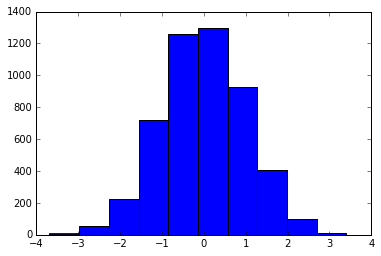

In [72]:
plt.hist(z2)

In [46]:
np.cov(z1, z2)

array([[ 1.00777768,  0.01129018],
       [ 0.01129018,  0.98454131]])

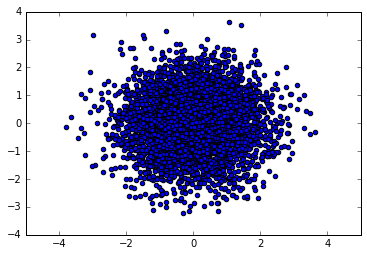

In [47]:
plt.scatter(z1, z2)

In [48]:
import seaborn as sns

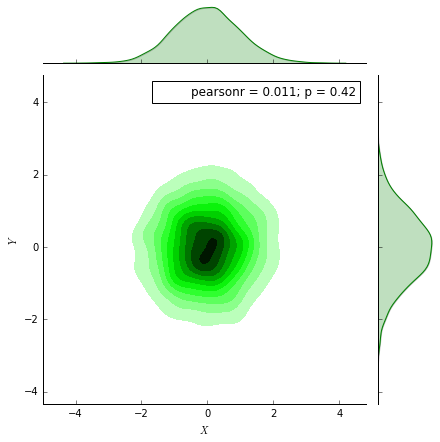

In [54]:
g = sns.jointplot(x="x", y="y", data={'x':z1, 'y':z2}, kind="kde", color="g")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=.001, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

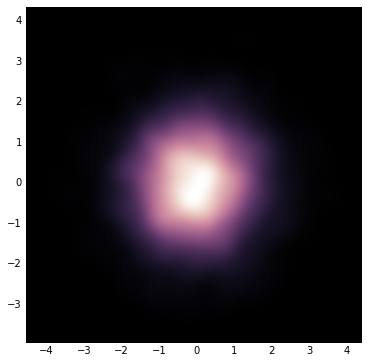

In [56]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(z1, z2, cmap=cmap, n_levels=1000, shade=True);

This is because sin and cos are uncorrelated: The integral from 0 to 2pi of (sinx - mean(sin(x)))(cosx - mean(cos(x))) is sin^2(2pi) - sin^2(0) = 0

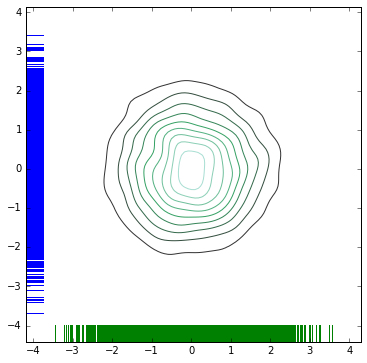

In [73]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(z1, z2, ax=ax)
sns.rugplot(z1, color="g", ax=ax)
sns.rugplot(z2, vertical=True, ax=ax);

In [74]:
# The covariance matrix A is generated from a radial basis function

In [333]:
def radial_basis_cov(t1, t2, sigma_squared = 1, l = .02):
    return sigma_squared * np.exp(-(t1 - t2)**2 / (2 * l**2))

In [334]:
size = 100
increments = np.array(range(size))/ 100.0 + (np.random.random(size) - 0.5) / 100.0

In [335]:
to_plot = [radial_basis_cov(0, i) for i in increments]

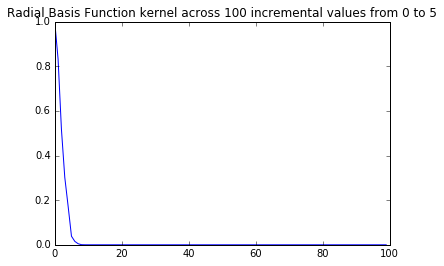

In [336]:
plt.plot(to_plot)
plt.title('Radial Basis Function kernel across {} incremental values from 0 to 5'.format(size))

In [337]:
Sigma = np.zeros((len(increments),len(increments)) )

In [338]:
for i, x in enumerate(increments):
    for j, y in enumerate(increments):
        Sigma[i, j] = radial_basis_cov(x, y)

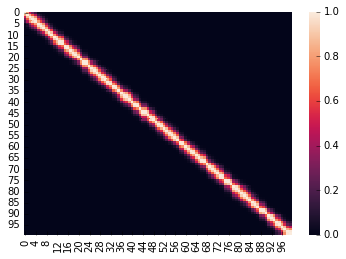

In [339]:
sns.heatmap(Sigma)

In [340]:
# is it symmetric?
for i, x in enumerate(increments):
    for j, y in enumerate(increments):
        if Sigma[i, j] != Sigma[j, i]:
            print 'NOT SYMMETRIC AT {} {}'.format(i, j)

In [341]:
# Strangely, any covariance matrix that is larger has
small_sig = Sigma[0:10, 0:10]
small_sig.shape

(10, 10)

In [342]:
def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

In [343]:
is_pos_def(small_sig)

True

In [344]:
print np.linalg.eigvalsh(small_sig)

[  3.12812773e-06   6.51040940e-05   1.60350947e-03   1.07777976e-02
   6.30811307e-02   2.00874774e-01   7.35709937e-01   1.45454480e+00
   2.88958283e+00   4.64375699e+00]


In [345]:
np.linalg.matrix_rank(Sigma)

100

In [346]:
np.linalg.matrix_rank(small_sig)

10

In [327]:
A = np.linalg.cholesky(small_sig)
np.allclose(small_sig, np.matmul(A, A.transpose()))

True

In [348]:
A = np.linalg.cholesky(Sigma)
np.allclose(Sigma, np.matmul(A, A.transpose()))

True

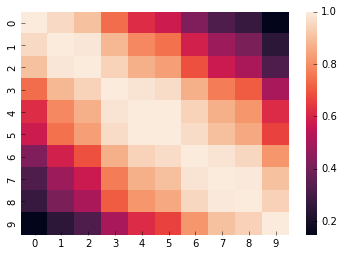

In [329]:
sns.heatmap(small_sig)

In [330]:
for i in range()

SyntaxError: invalid syntax (<ipython-input-330-e3f9b14113c5>, line 1)

In [278]:
z2[0:9]

array([ 0.94443668, -0.48911159, -1.79773358, -0.75506394, -1.05524743,
       -0.71914991,  0.97473746,  0.17880581,  0.2345808 ])

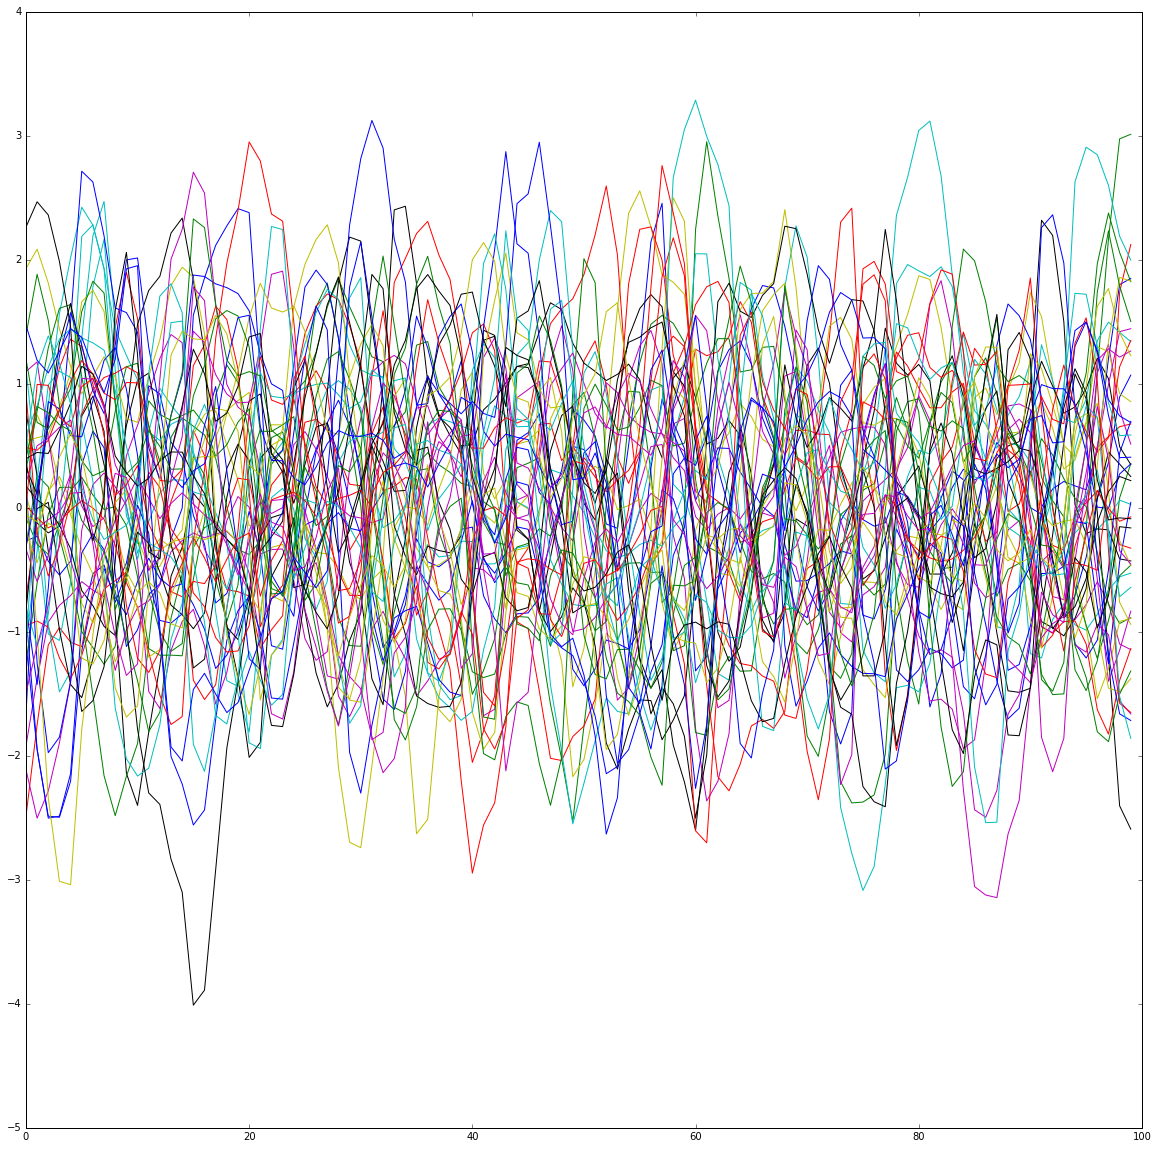

In [352]:
len_vec = 100
plt.figure(figsize=(20, 20))
# generate many multivariate gaussians with radial basis function covariance
for i in range(50):
    x = range(len_vec)
    index = i*len_vec
    y = A.dot(z1[index:index+ len_vec])
    plt.plot(x, y)

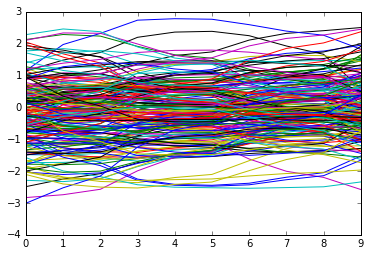

In [331]:
len_vec = 10
# generate many multivariate gaussians with radial basis function covariance
for i in range(200):
    x = range(len_vec)
    index = i*10
    y = A.dot(z1[index:index+ len_vec])
    plt.plot(x, y)